In [ ]:
!gdown 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 125MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("4K_House_Rent_Dataset.csv")
print(data.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [ ]:
bhk = np.array(data["BHK"].values)
print(bhk, np.unique(bhk))

furnish = np.array(data["Furnishing Status"])
unique_furnish = np.unique(furnish)

area_type = np.array(data["Area Type"].values)
unique_area_type = np.unique(area_type)

[2 2 2 ... 3 3 2] [1 2 3 4 5 6]


In [ ]:
def normalize(arr):
  denom = max(arr) - min(arr)
  avg = np.mean(arr)

  temp = np.empty(len(arr));
  for i in range(len(arr)):
    temp[i] = (arr[i]-avg) / denom
  return temp

In [ ]:
x1, x2, x4, y = data["BHK"].values, data["Size"].values, data["Bathroom"].values, data["Rent"].values
x3 = data["Area Type"].replace({"Built Area": 0, "Carpet Area": 1, "Super Area": 2}).values
x5 = data["Furnishing Status"].replace({"Unfurnished": 0, "Semi-Furnished": 1, "Furnished": 2}).values

x1, x2, x3, x4, x5 = normalize(np.array(x1)), normalize(np.array(x2)), normalize(np.array(x3)), normalize(np.array(x4)), normalize(np.array(x5))
x1, x2, x3, x4, x5

(array([-0.01677202, -0.01677202, -0.01677202, ...,  0.18322798,
         0.18322798, -0.01677202]),
 array([ 0.01658439, -0.02096254,  0.00406874, ...,  0.09793608,
         0.06664697,  0.00406874]),
 array([ 0.24252002,  0.24252002,  0.24252002, ..., -0.25747998,
        -0.25747998, -0.25747998]),
 array([ 0.00379267, -0.10731844, -0.10731844, ...,  0.11490378,
         0.00379267,  0.00379267]),
 array([-0.38042562,  0.11957438,  0.11957438, ...,  0.11957438,
         0.11957438, -0.38042562]))

In [ ]:
Y = np.array(y)
X = np.array([[a0,a1,a2,a3, a4, a5] for a0,a1,a2,a3, a4, a5 in zip(np.ones(len(y)),x1,x2,x3,x4,x5)])

print(X[2:10])
print(Y[2:10])

[[ 1.         -0.01677202  0.00406874  0.24252002 -0.10731844  0.11957438]
 [ 1.         -0.01677202 -0.02096254  0.24252002 -0.10731844 -0.38042562]
 [ 1.         -0.01677202 -0.01470472 -0.25747998 -0.10731844 -0.38042562]
 [ 1.         -0.01677202 -0.04599383  0.24252002  0.00379267 -0.38042562]
 [ 1.         -0.01677202 -0.03347819  0.24252002  0.00379267 -0.38042562]
 [ 1.         -0.21677202 -0.08979859  0.24252002 -0.10731844 -0.38042562]
 [ 1.         -0.01677202 -0.02096254 -0.25747998  0.00379267 -0.38042562]
 [ 1.         -0.01677202  0.00406874 -0.25747998  0.00379267  0.11957438]]
[17000 10000  7500  7000 10000  5000 26000 10000]


Gradient **Descent** Method

In [ ]:
def LinReg_with_gradient_descent(X, y, alpha, epoch):
  m = X.shape[0]
  n = X.shape[1]
  Theta = np.ones(n)
  h = np.dot(X, Theta)

  # Gradient Descent algorithm
  cost = np.ones(epoch)
  for i in range(epoch):

    for j in range(n):
      Theta[j] = Theta[j] - (alpha / m) * np.sum(np.multiply(h-y, X[:, j]))
    h = np.dot(X, Theta)
    cost = 0.5/m * np.sum(np.square(h-y))

  return Theta

theta = LinReg_with_gradient_descent(X, Y, .9, 100000)

In [ ]:
def single_normalize(arr, val):
  denom = max(arr)-min(arr)
  return (val-np.mean(arr)) / denom

In [ ]:
def predict(X_test):
  return np.dot(X_test, theta)
print("Prediction for (BHK: 2, Size: 1100, Area Type: 1, Bathroom: 2, Furnished Status: 2): ", predict(np.array([1,  single_normalize(x1, 2), single_normalize(x2, 1100), single_normalize(x3, 1), single_normalize(x4, 2), single_normalize(x5, 2)]) ))

Prediction for (BHK: 2, Size: 1100, Area Type: 1, Bathroom: 2, Furnished Status: 2):  230835366.80905926


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot(x, y, label_x, label_y, theta, theta0):
  lin_x = np.linspace(np.min(x), np.max(x), 10)
  reg_line = theta * lin_x + theta0
  plt.plot(lin_x, reg_line, c='r', label='Regression Line')
  plt.scatter(x, y, label = 'Scatter Plot')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.legend()
  plt.show()

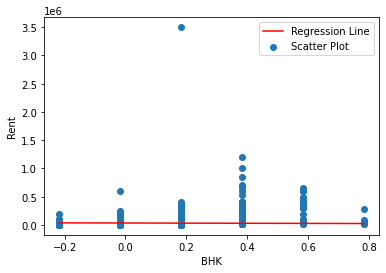

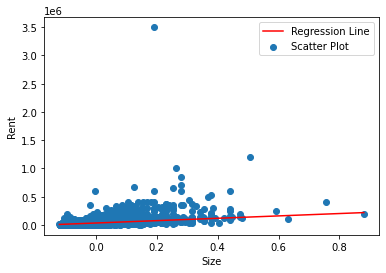

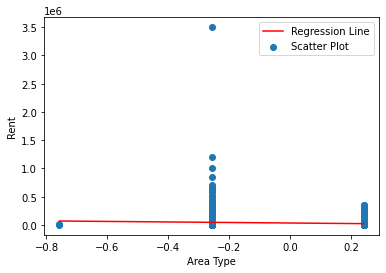

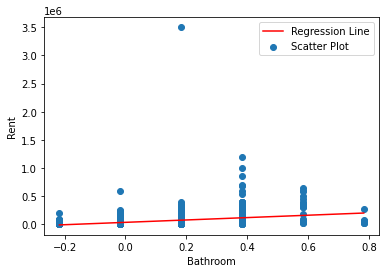

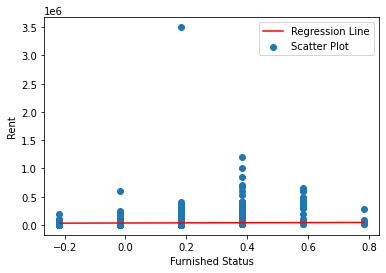

In [ ]:
plot(x1, y, "BHK", "Rent", theta[1], theta[0])
plot(x2, y, "Size", "Rent", theta[2], theta[0])
plot(x3, y, "Area Type", "Rent", theta[3], theta[0])
plot(x1, y, "Bathroom", "Rent", theta[4], theta[0])
plot(x1, y, "Furnished Status", "Rent", theta[5], theta[0])